# Import libraries

The `brisk` library is a custom-made Python library for the import, analysis and visualization of data from the BRISK project.
It comprises scripts and modules for managing data. All the main functions will be compiled in a script in order to be able to use all the functions outside the Python environment

A guide for the installation and the setup of the database, together with the list of scripts will be provided when the whole analysis is set up.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings

import brisk.visualization.plots_imu as imu
from brisk.utils import path
from brisk.analysis import segmentation

warnings.filterwarnings('ignore')

# List all the subjects

In the `brisk` library, a series of functions for the description of the database (number of subjects, number of trials) is provided.

In [16]:
subjects = path.get_subjects()
print(subjects)

subject = 'giovanni'
update_subject = True
trials = path.get_trials(subject)
print(trials)

['alessandro', 'bocchetta', 'carucci', 'emanuele', 'gaetano', 'galletti', 'giovanni', 'lorenzo', 'luca', 'micheal', 'mizio', 'sayf', 'simone']
['full', 'full_robot', 'half_robot', 'half_robot_touch']


# Visualize IMU data for one subject

Functions are provided also for the visualization of raw data (after a 5Hz LP filter)

<span style="color: red; font-weight: bold">Note</span> AP, ML and VT directions are defined during the neutral pose (arms parallel to the ground)

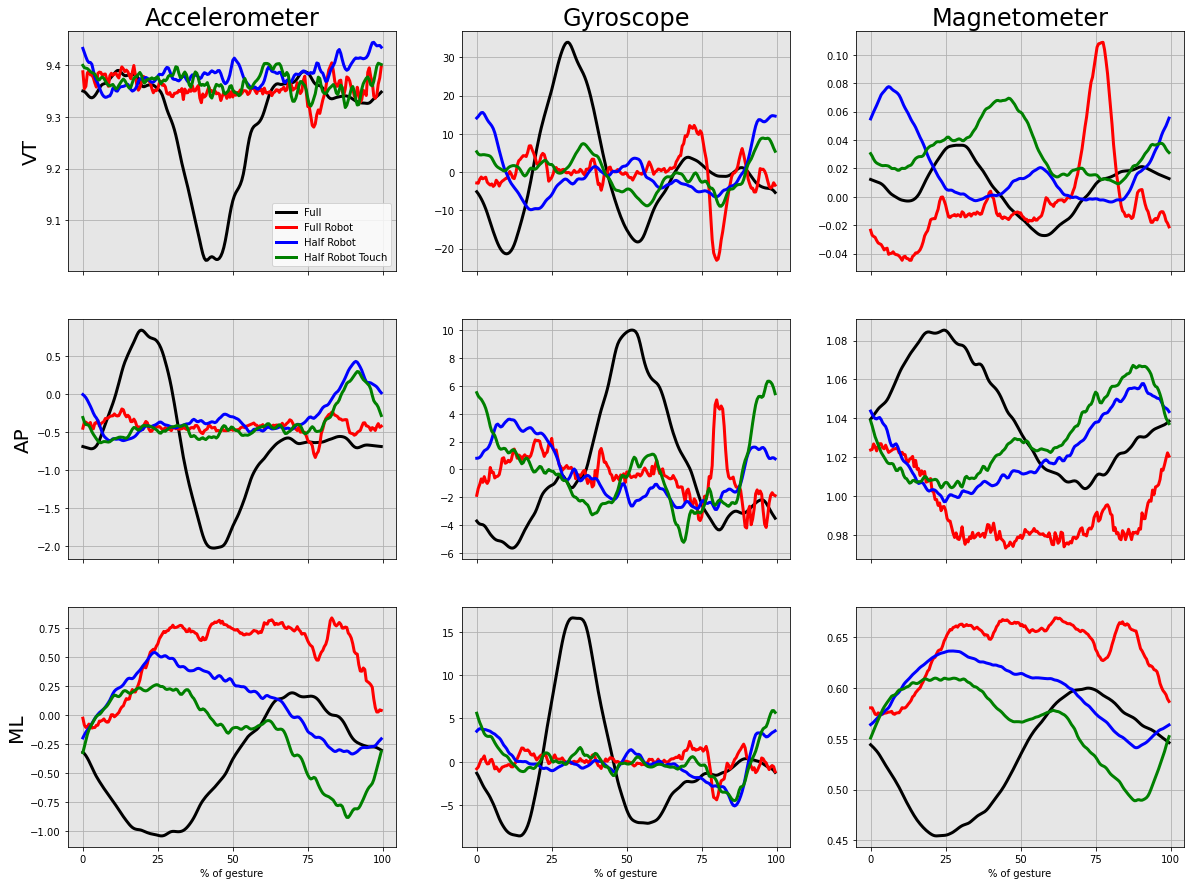

In [17]:
segment = 'trunk'
imu.plot_all_trials(subject, 'trunk')

# Get gesture frequency

All the quantitative analyses on the data will be hard-coded in the library, to ensure repeatability. Here, an example of the analysis of the speed of gestures, in terms of packages per minute

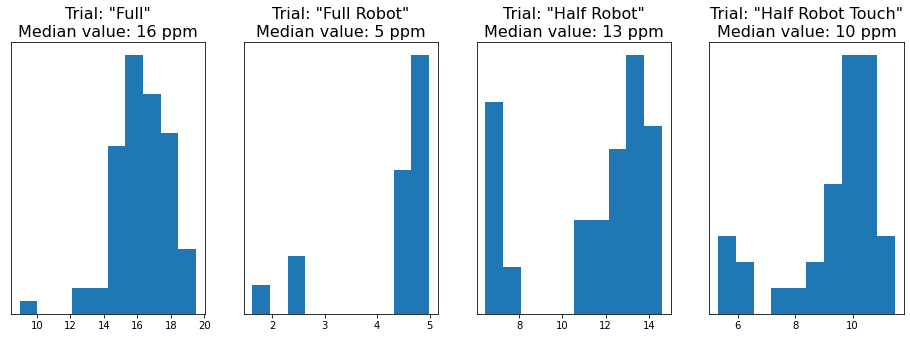

In [18]:
frequencies = segmentation.get_frequencies(subject)

fig, ax = plt.subplots(1,4,figsize=(16,5))
for i, k in enumerate(frequencies.keys()):
    ax[i].hist(frequencies[k])
    ax[i].set_title(
        f'Trial: \"{k.replace("_"," ").title()}\"\nMedian value: {np.median(frequencies[k]):.0f} ppm',
        fontsize=16
    )
    ax[i].set_yticks([])

# Time parameters

Frequencies and durations are selected as time-related global parameters

In [19]:
from brisk.analysis import parameters

tp = parameters.get_time_parameters(subject)
for k,v in tp.items():
    print(f'Trial {k.replace("_"," ").title()}, {v["all_frequency"].size} trials after outliers removal')
    print(f'\tAverage frequency: {v["avg_frequency"]:.0f} PPM')
    print(f'\tAverage duration: {v["avg_duration"]:.2f} s')
    print(f'\tVariability of duration: {v["std_duration"]:.2f} s')
    print()

Trial Full, 66 trials after outliers removal
	Average frequency: 16 PPM
	Average duration: 3.72 s
	Variability of duration: 0.40 s

Trial Full Robot, 15 trials after outliers removal
	Average frequency: 5 PPM
	Average duration: 12.75 s
	Variability of duration: 0.57 s

Trial Half Robot, 39 trials after outliers removal
	Average frequency: 13 PPM
	Average duration: 4.76 s
	Variability of duration: 0.98 s

Trial Half Robot Touch, 33 trials after outliers removal
	Average frequency: 10 PPM
	Average duration: 5.97 s
	Variability of duration: 0.66 s



# Extraction of the cycle based parameters

The cycle based parameters are:

- RMS value during the event (after removing mean value)
- Smoothness during the event (after removing mean value), described via the negative log-dimensionless jerk (i.e. more negative, less smooth)
- Value range during the event

All the parameters have been calculated on the 3 spatial component and on the global (total) value, of both accelerometer and gyroscope data

In [20]:
param = parameters.cycle_parameters(subject, update=update_subject)

Updating trial Full...
Updating trial Full Robot...
Updating trial Half Robot...
Updating trial Half Robot Touch...


# Extraction of the global parameters

In addition to the average value of the cycle parameters, regularity (i.e. value of the first peak of the autocorrelation) has been used as a parameter

In [21]:
pp = parameters.global_parameters(subject, update=update_subject)

Loading saved cycle parameters...
Updating trial Full...
Updating trial Full Robot...
Updating trial Half Robot...
Updating trial Half Robot Touch...


# Plots

## Accelerometer

### Trunk

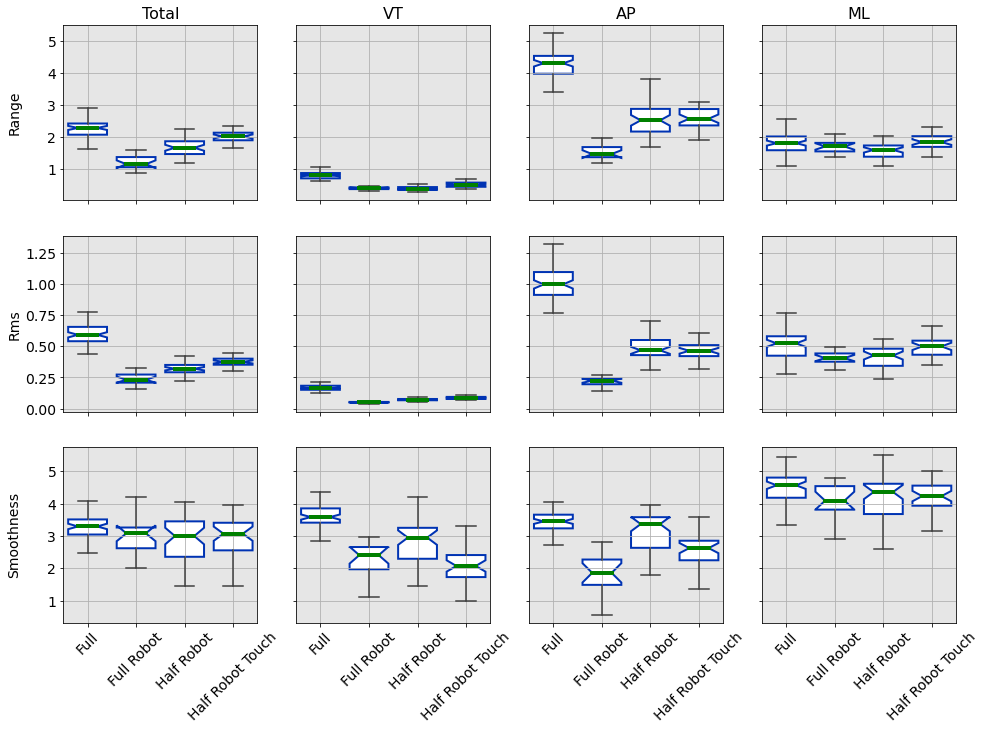

In [22]:
imu.plot_parameters(param, 'trunk', 'acc')

### Arm

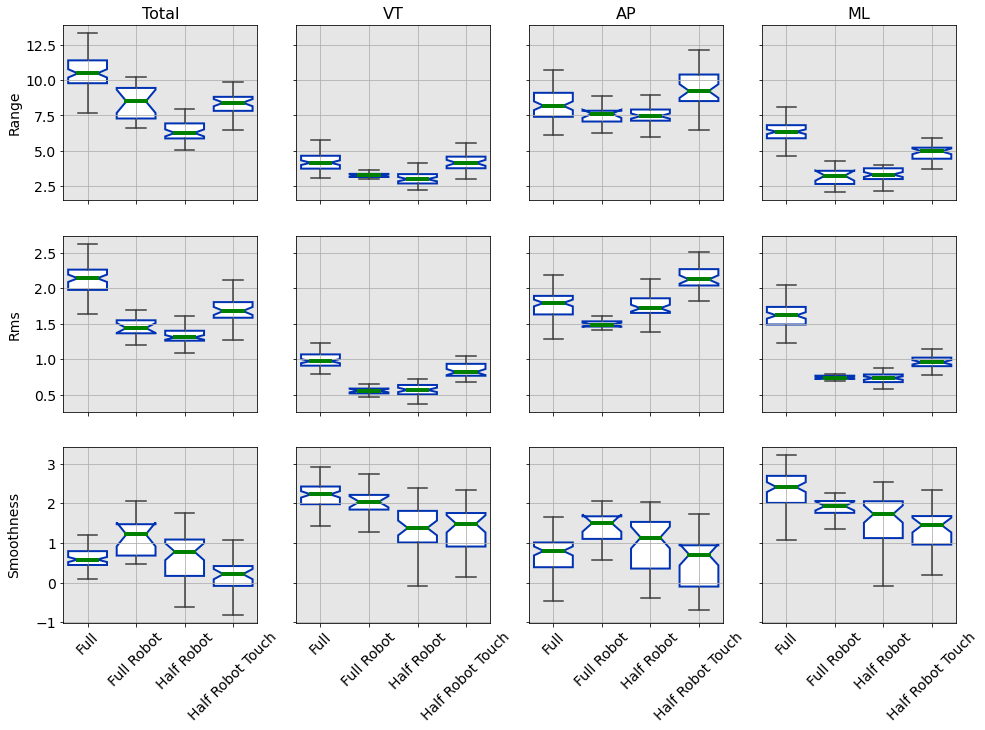

In [23]:
imu.plot_parameters(param, 'arm', 'acc')

### Forearm

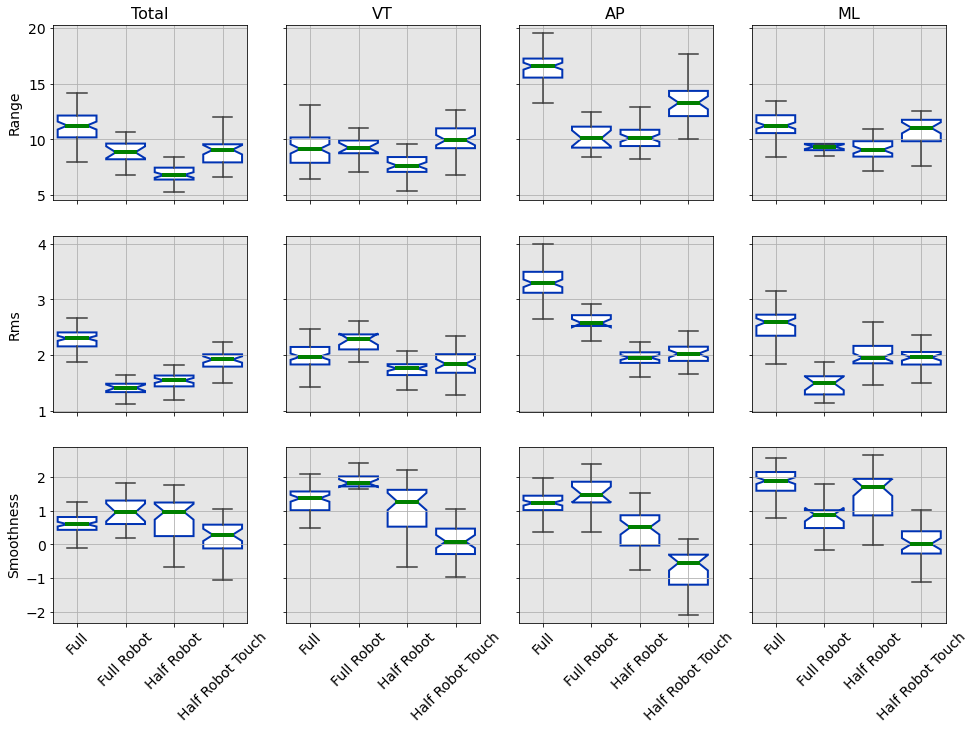

In [24]:
imu.plot_parameters(param, 'forearm', 'acc')

## Gyroscope

### Trunk

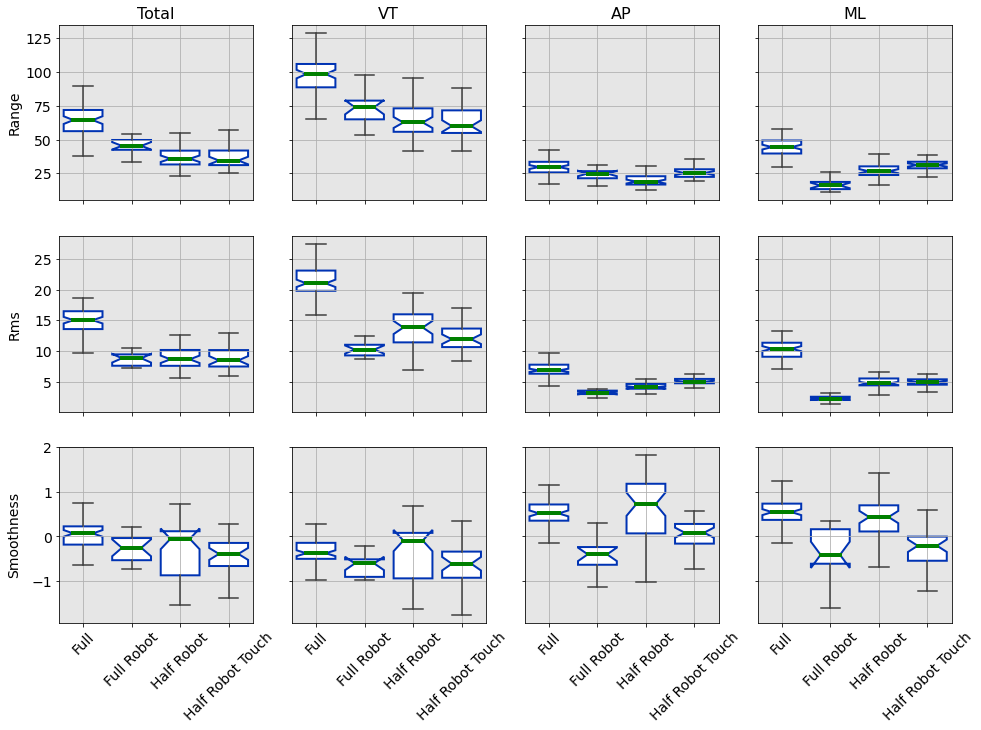

In [25]:
imu.plot_parameters(param, 'trunk', 'gyr')

### Arm

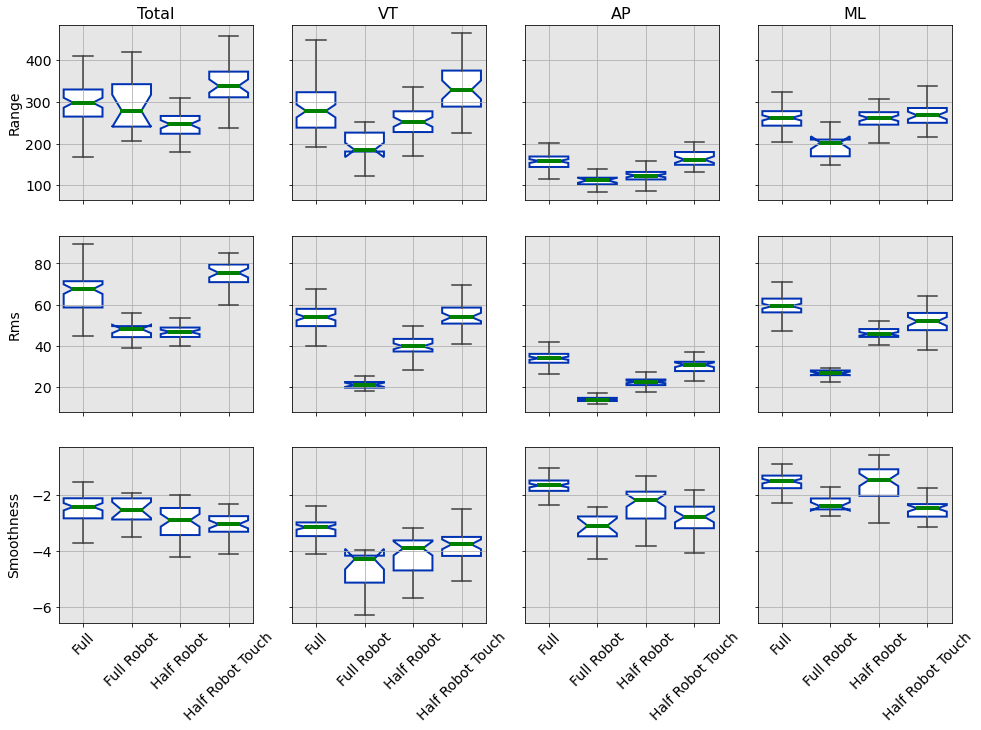

In [26]:
imu.plot_parameters(param, 'arm', 'gyr')

### Forearm

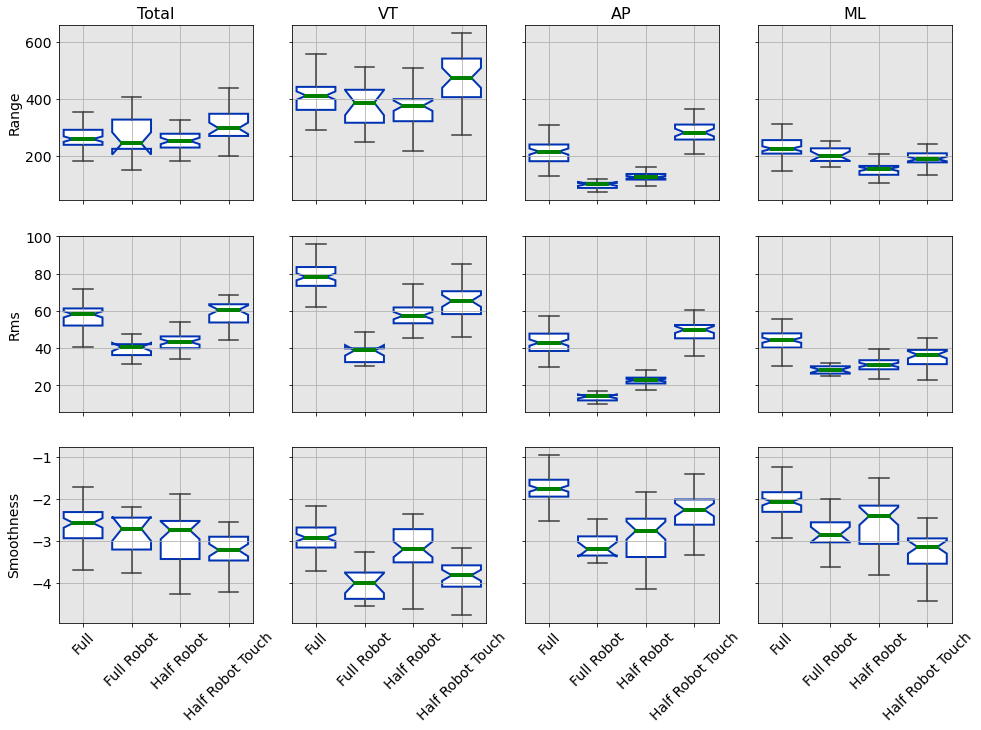

In [27]:
imu.plot_parameters(param, 'forearm', 'gyr')

# Global parameters

Here all the global parameters (number of events, median values for the cycle-based parameters and regularity) are shown.

In [28]:
pp.sort_values(axis=0,by=['segment','dimension']).set_index(['segment','dimension','trial']).head(pp.shape[0])

smoothness_acc  range_acc   rms_acc  \
segment dimension trial                                                   
arm     global    full                    0.604666  10.550134  2.135069   
                  full_robot              1.135042   8.437178  1.478929   
                  half_robot              0.612119   6.448466  1.310934   
                  half_robot_touch        0.136012   8.495759  1.696613   
        x         full                    2.215556   4.226352  0.982709   
                  full_robot              1.943624   3.280358  0.552183   
                  half_robot              1.350056   3.050987  0.564916   
                  half_robot_touch        1.387748   4.216446  0.844436   
        y         full                    0.709089   8.308123  1.783224   
                  full_robot              1.291888   7.585649  1.516156   
                  half_robot              0.972308   7.489685  1.736351   
                  half_robot_touch        0.548001   9.450207  2.151282   
        z         full                    2.376384   6.407462  1.613787   
                  full_robot              1.770218   3.223410  0.742580   
                  half_robot              1.563279   3.376330  0.730082   
                  half_robot_touch        1.328888   4.918464  0.969600   
forearm global    full                    0.629376  11.181121  2.295253   
                  full_robot              0.899392   8.852381  1.426472   
                  half_robot              0.813068   6.914750  1.536304   
                  half_robot_touch        0.156549   8.960327  1.900865   
        x         full                    1.296789   9.176400  1.986825   
                  full_robot              1.662212   9.380320  2.245923   
                  half_robot              1.115170   7.753912  1.749791   
                  half_robot_touch        0.088573   9.966043  1.823005   
        y         full                    1.208461  16.400017  3.310434   
                  full_robot              1.433834  10.182882  2.599461   
                  half_robot              0.425483  10.253966  1.968821   
                  half_robot_touch       -0.712387  13.232011  2.007155   
        z         full                    1.820911  11.192043  2.542548   
                  full_robot              0.812059   9.473847  1.492465   
                  half_robot              1.434335   9.026776  1.995554   
                  half_robot_touch        0.049409  10.716385  1.951791   
trunk   global    full                    3.269374   2.278515  0.594876   
                  full_robot              2.891291   1.193809  0.243876   
                  half_robot              2.880494   1.705162  0.324579   
                  half_robot_touch        2.868755   2.021099  0.375301   
        x         full                    3.617050   0.811983  0.168058   
                  full_robot              2.224933   0.397958  0.048990   
                  half_robot              2.778913   0.411338  0.072047   
                  half_robot_touch        2.050920   0.525312  0.086362   
        y         full                    3.407796   4.295511  1.000563   
                  full_robot              1.835826   1.513665  0.215296   
                  half_robot              3.099117   2.524909  0.486258   
                  half_robot_touch        2.477046   2.615458  0.466814   
        z         full                    4.482515   1.810540  0.512965   
                  full_robot              4.028910   1.709445  0.402134   
                  half_robot              4.178673   1.576331  0.417294   
                  half_robot_touch        4.120592   1.869988  0.502230   

                                    smoothness_gyr   range_gyr    rms_gyr  \
segment dimension trial                                                     
arm     global    full                   -2.512104  295.925262  65.814036   
                  full_robot             -2.663449  28